# **Number detection algorithm**

# Read database

Functions used to read the database (train and test) from MNIST and also from the csv file generated with the images captured from the pico camera

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib

In [2]:
def separate_array(data):    
    image = []
    labels = []
    for line in data:
        image.append(np.array(line[:-1]))
        labels.append(line[-1])
    
    return image, labels

In [3]:
def feature_test(Xarray):
    new_array = []
    for i in range(len(Xarray)):
        new_array.append(Xarray[i][9])
    
    return np.asarray(new_array)



In [4]:
X_train, Y_train = separate_array(np.load('.//photosFeatures_train.npy'))
#X_train = feature_test(X_train)
X_validation, Y_validation = separate_array(np.load('./photosFeatures_validation.npy'))
#X_validation = feature_test(X_validation)

In [5]:
print len(Y_validation)
print len(Y_train)

2700
10260


# **Evaluation methods**

This part contains the functions used to analyse the accuracy of the classifier

In [18]:
def plot_confusion_matrix(clf, data_x, data_y):
    classes = range(1,7)
    
    Ypred = clf.predict(data_x)
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# **Support Vector Machine algorithm**

In [13]:
def create_number_list(data):
    images = []
    for x in data:
        images.append(x.reshape(-1))

    return images

In [21]:
def train_svmModel(i, X_data, Y_data):
    # Train on the first N train images
    train_x = create_number_list(X_data)
    train_y = np.array(Y_data)
    
    #Train the classifier
    clf =  svm.SVC(kernel='rbf')
    print("Finished trainning Support Vector Machine Model with " + str(i))
    return clf.fit(train_x, train_y)



In [22]:
def visualize_svm_Model(clf, X_data, Y_data, filename, typeData):
    # Visualize on the images from dataset:
    data_x = create_number_list(X_data)
    data_y = Y_data 
    predicted = clf.predict(data_x)
    
    plot_confusion_matrix(clf, data_x, data_y)
    plt.title(typeData + ' confusion matrix: accuracy of ' + str(round((accuracy_score(data_y, predicted) * 100), 3)) + "% \n Used " + str(len(data_x)) + " images")
    plt.savefig(filename)

In [23]:
svm_classifier = train_svmModel(5, X_train, Y_train)

Finished trainning Support Vector Machine Model with 5


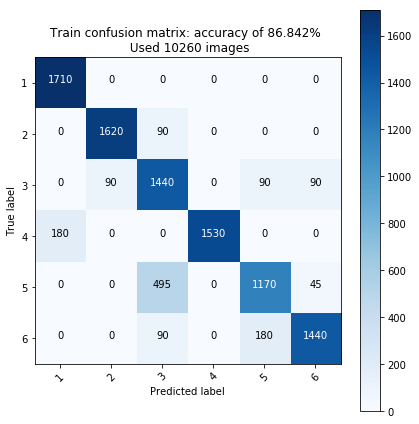

In [24]:
visualize_svm_Model(svm_classifier, X_train, Y_train,'./Results/svm/train', 'Train')

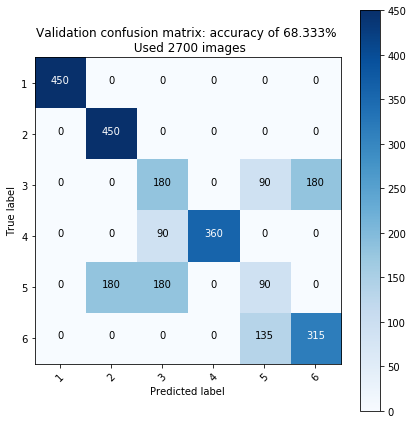

In [25]:
visualize_svm_Model(svm_classifier, X_validation, Y_validation,'./Results/svm/validation', 'Validation')

In [26]:
# save the classifier
filename = './Results/svm/svm_classifier.sav'
joblib.dump(svm_classifier, filename, compress = 3)  

['./Results/svm/svm_classifier.sav']